In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load data order details
order_detail = pd.read_csv("order_details.csv")

In [3]:
order_detail.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
#load data orders
order = pd.read_csv("orders.csv")
order.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [5]:
#load data pizza type
pizza_type = pd.read_csv("pizza_type.csv")
pizza_type.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [6]:
#load data pizzas
pizza = pd.read_csv("pizzas.csv")
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [7]:
order_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [9]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [10]:
pizza_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [11]:
# merging all datasets together

pizza_df = order.merge(order_detail, on='order_id').merge(pizza, on='pizza_id').merge(pizza_type, on='pizza_type_id')

In [12]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [13]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.8+ MB


In [14]:
# checking the sum of null values

pizza_df.isnull().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [15]:
#checking for duplicates
pizza_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48615    False
48616    False
48617    False
48618    False
48619    False
Length: 48620, dtype: bool

##### What is the total revenue/sales?

In [16]:
sales = pizza_df["quantity"] * pizza_df["price"]

In [17]:
total_sales = sales.sum()
total_sales

817860.05

##### the total quantity sold

In [18]:
pizza_df["quantity"].sum()

49574

###### total orders

In [19]:
total_order = pizza_df["order_id"]

In [20]:
len(total_order)

48620

##### How many pizza types do they sell?

In [21]:
pizza_type = pizza_df["name"].value_counts()
pizza_type

The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza                

In [22]:
number_of_pizza = len(pizza_type)
number_of_pizza

32

In [23]:
pizza_df["name"].nunique()

32

In [24]:
print(f"They sell {number_of_pizza} different types of Pizza")

They sell 32 different types of Pizza


##### Average price of the pizzas.

In [25]:
pizza_df["price"].mean()

16.49413204442518

##### Peak hours of sales?

In [26]:
# converting the time column to datetime format
pizza_df["time"] = pd.to_datetime(pizza_df["time"])

# Extracting hour from the time column
pizza_df["hour"] = pizza_df["time"].dt.hour

# count the number of orders per hour
hourly_orders = pizza_df.groupby("hour").size()

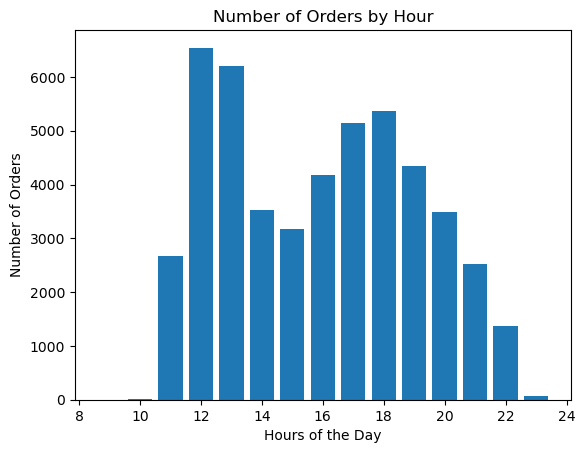

In [27]:
plt.bar(hourly_orders.index, hourly_orders.values)
plt.title("Number of Orders by Hour")
plt.xlabel("Hours of the Day")
plt.ylabel("Number of Orders")

plt.show()

##### Orders are highest around lunchtime (12–1 PM), with a second smaller peak in the early evening (5–6 PM). Activity dips in the mid-afternoon (2–4 PM) and steadily declines after 7 PM, reaching very low levels by late evening. Overall, demand is strongly driven by lunch and dinner periods


In [28]:
pizza_df["sales"] = pizza_df["quantity"] * pizza_df["price"]

In [29]:
pizza_df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,hour,sales
0,1,2015-01-01,2026-02-16 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",11,13.25
1,77,2015-01-02,2026-02-16 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",12,13.25
2,146,2015-01-03,2026-02-16 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",14,13.25
3,163,2015-01-03,2026-02-16 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",16,13.25
4,247,2015-01-04,2026-02-16 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",20,13.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,2026-02-16 17:39:57,48176,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",17,23.65
48616,21198,2015-12-28,2026-02-16 15:39:02,48244,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",15,23.65
48617,21225,2015-12-29,2026-02-16 13:20:17,48311,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",13,23.65
48618,21282,2015-12-31,2026-02-16 12:09:59,48456,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",12,23.65


##### The total sales made on each day of the week. Which day of the week is when sales are made the most?

In [30]:
# converting the time column to datetime format
pizza_df["date"] = pd.to_datetime(pizza_df["date"])

# Extracting hour from the time column
pizza_df["day"] = pizza_df["date"].dt.dayofweek

# count the number of orders per hour
dayly_orders = pizza_df.groupby("day")["sales"].sum()

In [31]:
dayly_orders 

day
0    107329.55
1    114133.80
2    114408.40
3    123528.50
4    136073.90
5    123182.40
6     99203.50
Name: sales, dtype: float64

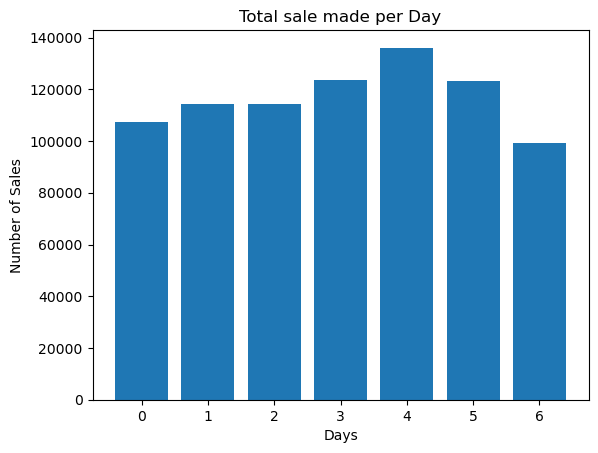

In [32]:
plt.bar(dayly_orders.index, dayly_orders.values)
plt.title("Total sale made per Day")
plt.xlabel("Days")
plt.ylabel("Number of Sales")

plt.show()

##### Sales increased steadily from Day 0 to Day 4, peaked on Day 4, then declined toward Day 6.Overall, the weekly plot shows strong mid-week performance with a noticeable drop at the end of the week.

##### Top 5 best selling pizzas

In [33]:
best_selling_pizza = pizza_df.groupby("name")["quantity"].sum().sort_values(ascending=False)

In [34]:
pizza_rank = pd.DataFrame(best_selling_pizza).reset_index()
top_5_sales = pizza_rank.head(5)
top_5_sales

,name,quantity
0,The Classic Deluxe Pizza,2453
1,The Barbecue Chicken Pizza,2432
2,The Hawaiian Pizza,2422
3,The Pepperoni Pizza,2418
4,The Thai Chicken Pizza,2371


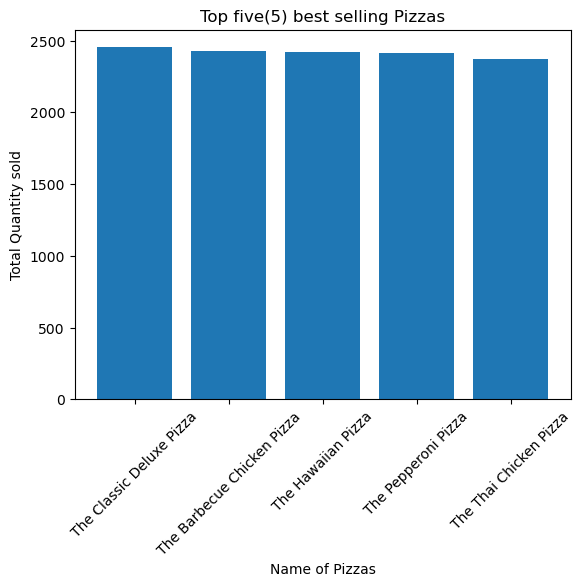

In [35]:
plt.bar(top_5_sales.name, top_5_sales.quantity)
plt.xticks(rotation=45)
plt.title("Top five(5) best selling Pizzas")
plt.xlabel("Name of Pizzas")
plt.ylabel("Total Quantity sold")

plt.show()

##### The Classic Deluxe Pizza is the top seller, followed very closely by Barbecue Chicken, Hawaiian, and Pepperoni pizzas. Thai Chicken Pizza ranks fifth.Overall, sales among the top five pizzas are very similar, showing consistent customer preference across these popular flavors.

##### Sales made in each month. Any trend noticeable?

In [36]:
# converting the date column to datetime format
pizza_df["date"] = pd.to_datetime(pizza_df["date"])

# Extracting month from the date column
pizza_df["month"] = pizza_df["date"].dt.strftime('%m')

# sum the number of sale made in each month
monthly_sales = pizza_df.groupby("month")["sales"].sum().reset_index()

In [37]:
monthly_sales

,month,sales
0,01,69793.30
1,02,65159.60
2,03,70397.10
3,04,68736.80
4,05,71402.75
5,06,68230.20
6,07,72557.90
7,08,68278.25
8,09,64180.05
9,10,64027.60


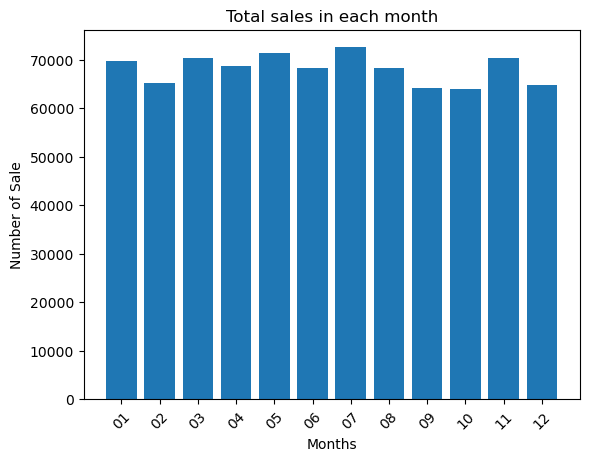

In [38]:
plt.bar(monthly_sales["month"], monthly_sales["sales"])
plt.xticks(rotation=45)
plt.title("Total sales in each month")
plt.xlabel("Months")
plt.ylabel("Number of Sale")

plt.show()

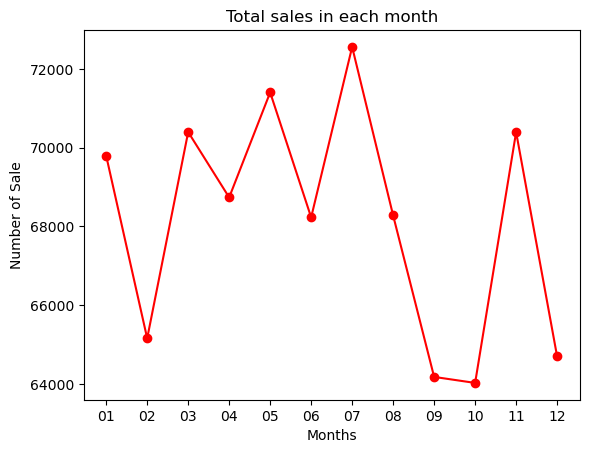

In [39]:
plt.plot(monthly_sales["month"], monthly_sales["sales"], color="red", marker="o")
plt.title("Total sales in each month")
plt.xlabel("Months")
plt.ylabel("Number of Sale")
plt.show()

###### The line chart shows the total sales for each month of the year. Overall, sales fluctuate throughout the year without a clear long-term upward or downward trend. 
##### In summary, the data shows noticeable month-to-month volatility, with the highest sales in July

##### Are there pizza types that are not doing well on the menu?

In [40]:
pizza_type_order = pizza_df.groupby("pizza_type_id")["quantity"].sum()

In [41]:
sorted_pizza_type_order = pizza_type_order.sort_values(ascending=True)
sorted_pizza_type_order

pizza_type_id
brie_carre       490
mediterraneo     934
calabrese        937
spinach_supr     950
soppressata      961
spin_pesto       970
ckn_pesto        973
ital_veggie      981
ckn_alfredo      987
green_garden     997
pep_msh_pep     1359
five_cheese     1409
the_greek       1420
ital_cpcllo     1438
peppr_salami    1446
spinach_fet     1446
prsc_argla      1457
napolitana      1464
mexicana        1484
veggie_veg      1526
ital_supr       1884
four_cheese     1902
big_meat        1914
southw_ckn      1917
spicy_ital      1924
sicilian        1938
cali_ckn        2370
thai_ckn        2371
pepperoni       2418
hawaiian        2422
bbq_ckn         2432
classic_dlx     2453
Name: quantity, dtype: int64

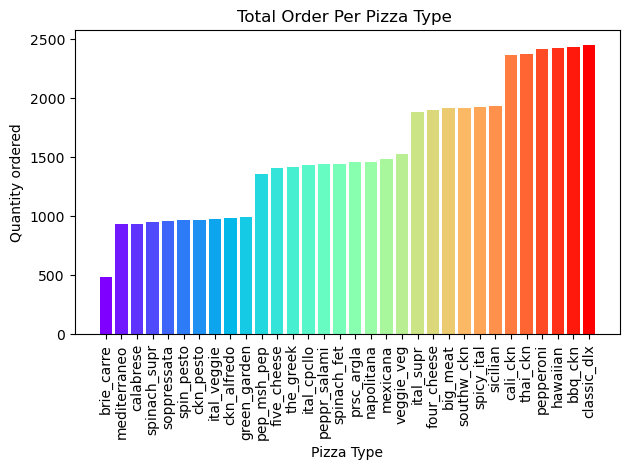

In [42]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(sorted_pizza_type_order)))
                        
plt.bar(sorted_pizza_type_order.index, sorted_pizza_type_order.values, color=colors)

plt.xlabel('Pizza Type')
plt.ylabel('Quantity ordered')
plt.xticks(rotation=90)
plt.title('Total Order Per Pizza Type ')

plt.tight_layout()

plt.show()

##### Brie Carre performs significantly worse than the others, while (mediterraneo , calabrese, spinach_supr, soppressata, spin_pesto, ckn_pesto, ital_veggie, ckn_alfredo, green_garden) are relatively close to each other in sales but still on the lower end overall.

###### How does each pizza size contribute to revenue?

In [43]:
pizza_revenue = pizza_df.groupby('size')['price'].sum().reset_index()
pizza_revenue

,size,price
0,L,366862.1
1,M,245409.5
2,S,174794.5
3,XL,13872.0
4,XXL,1006.6


In [44]:
total_revenue = pizza_revenue['price'].sum()


In [45]:
pizza_revenue['percentage'] = pizza_revenue['price']/total_revenue * 100
pizza_revenue

,size,price,percentage
0,L,366862.1,45.746558
1,M,245409.5,30.601798
2,S,174794.5,21.796328
3,XL,13872.0,1.729795
4,XXL,1006.6,0.125520


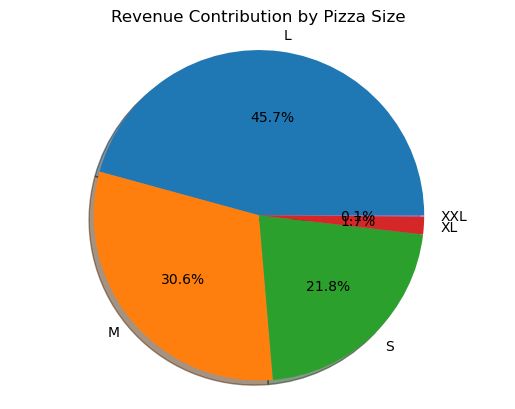

In [46]:
fig, ax = plt.subplots()
ax.pie(pizza_revenue['percentage'], labels=pizza_revenue['size'], autopct='%1.1f%%', shadow=True)

plt.axis('equal')
plt.title ('Revenue Contribution by Pizza Size')

plt.show()

##### Revenue is heavily concentrated in Large pizzas (45.7%), making them the primary revenue driver. Medium (30.6%) and Small (21.8%) sizes contribute significantly but less than Large. XL and XXL sizes add minimal revenue (~1–2%), suggesting low demand

##### What is the revenue contribution for each pizza type?

In [47]:
pizza_revenue = pizza_df.groupby('pizza_type_id')['price'].sum().reset_index()

total_revenue = pizza_revenue['price'].sum()

pizza_revenue['percentage'] = pizza_revenue['price']/total_revenue * 100

#sort dat based on highest contribution
pizza_revenue = pizza_revenue.sort_values('percentage', ascending=False)


In [48]:
pizza_revenue

,pizza_type_id,price,percentage
29,thai_ckn,42332.25,5.278699
0,bbq_ckn,41683.00,5.197740
4,cali_ckn,40166.50,5.008637
7,classic_dlx,37631.50,4.692531
25,spicy_ital,34163.50,4.260082
24,southw_ckn,34081.75,4.249888
13,ital_supr,32856.25,4.097072
11,hawaiian,31561.75,3.935652
9,four_cheese,31361.10,3.910631
22,sicilian,30123.75,3.756338


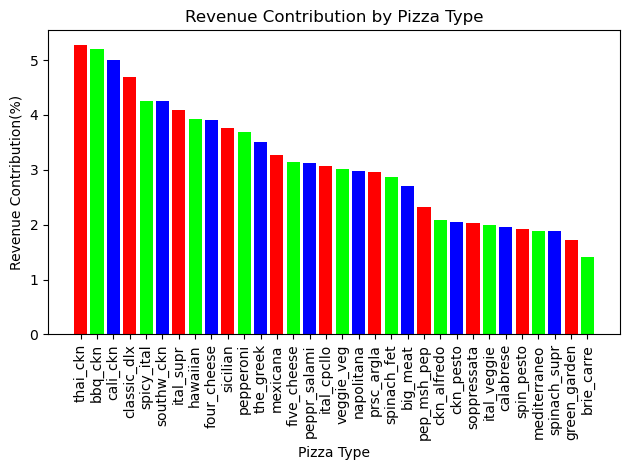

In [49]:
plt.bar(pizza_revenue['pizza_type_id'], pizza_revenue['percentage'], color=['#FF0000', '#00FF00', '#0000FF'])

plt.xlabel('Pizza Type')
plt.ylabel('Revenue Contribution(%)')
plt.xticks(rotation=90)
plt.title('Revenue Contribution by Pizza Type')

plt.tight_layout()

plt.show()

##### The type of pizza that contributes the highest revenue contribution is thai_ckn pizza with a revenue contribution of 5%, followed by bbq_ckn and cali_ckn.

##### Revenue distribution is fairly balanced — no single pizza dominates heavily.

##### The top 5 pizzas each contribute over 4%, indicating diversified demand.

##### The lowest performers still contribute over 1%, suggesting a broad but steady customer preference spread.